# Statistical Data Visualization

Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/python](https://feng.li/python)

## Basic Ploting with `matplotlib`

`matplotlib` is the most popular Python library for producing plots and other 2D data visualizations. It was originally created by John D. Hunter (JDH) and is now maintained by a large team of developers. It is well-suited for creating plots suitable for publication. It integrates well with IPython, thus providing a comfortable interactive environment for plotting and exploring data. The plots are also interactive; you can zoom in on a section of the plot and pan around the plot using the toolbar in the plot window.


- [matplotlib User Guide](https://matplotlib.org/stable/users/index.html)
- [matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)


```sh
pip3 install matplotlib -U
```

### Display the probability density function (pdf)

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
r = norm.rvs(loc=0, scale=1, size=1000)
x = np.linspace(norm.ppf(0.01), #ppf stands for percentiles.
                norm.ppf(0.99), 100)

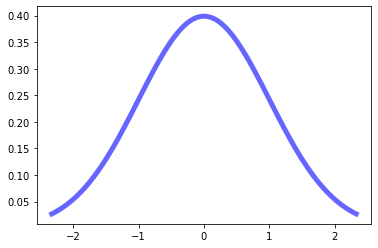

In [2]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x),
        'blue', lw=5, alpha=0.6, label='norm pdf')
plt.show()

- We could compare it with the histogram:

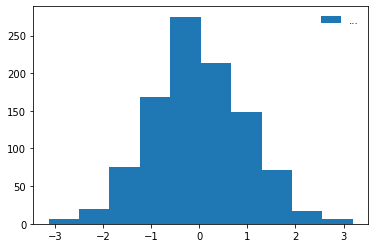

In [3]:
fig, ax = plt.subplots(1, 1)
ax.hist(r, histtype='stepfilled', alpha=1, label='...')
ax.legend(loc='best', frameon=False)
plt.show()

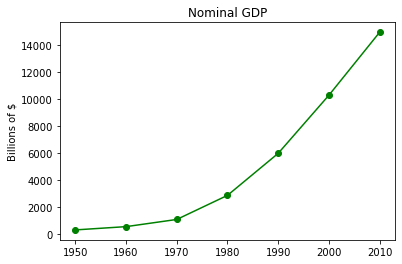

In [4]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
fig = plt.figure()
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

## 3D Plot

In [5]:
from scipy import special
def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

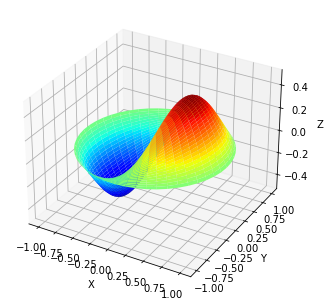

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Statistical Data Visualization with `Seaborn`

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.


- [Seaborn Examples](http://seaborn.pydata.org/examples/index.html)

In [7]:
# ! pip3 install seaborn -U

### Features that seaborn offers

- Several [built-in themes](http://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial) for styling matplotlib graphics
- Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
- Functions for visualizing univariate and bivariate **distributions** or for comparing them between subsets of data
- Tools that fit and visualize **linear regression** models for different kinds of independent and dependent variables
- Functions that visualize **matrices of data** and use clustering algorithms to discover structure in those matrices
- A function to plot statistical **timeseries** data with flexible estimation and representation of uncertainty around the estimate
- High-level abstractions for structuring grids of plots that let you easily build complex visualizations

### Comparison with `matplotlib`

- **Seaborn should be thought of as a complement to `matplotlib`, not a replacement for it**. When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. 

- Further, the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), but full customization will require changing attributes on the matplotlib objects directly. 

- The combination of seaborn’s high-level interface and matplotlib’s customizability and wide range of backends makes it easy to generate publication-quality figures.

## Visualizing the distribution of a dataset


When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [2]:
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

### Histograms

Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

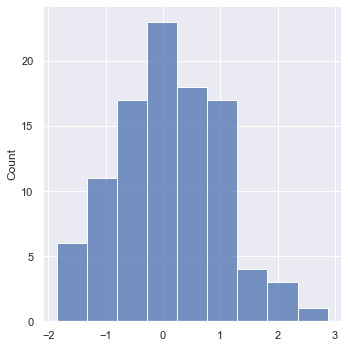

In [9]:
x = np.random.normal(size=100)
sns.displot(x)

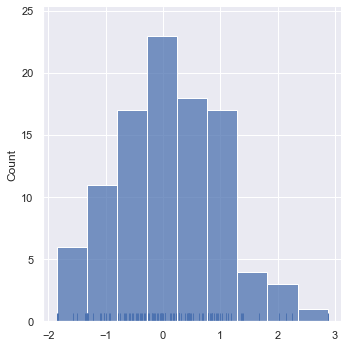

In [10]:
sns.displot(x, kde=False, rug=True);

In [11]:
import pandas as pd
sns.set_theme(style="darkgrid")
iris = pd.read_csv("data/iris.csv")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

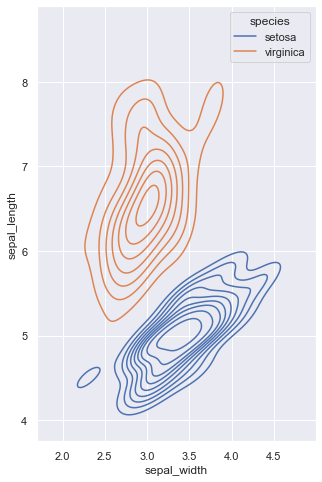

In [12]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)

### Kernel density estimation


It is also posible to use the kernel density estimation procedure to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in `jointplot()`:

In [6]:
import pandas as pd
import numpy as np
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

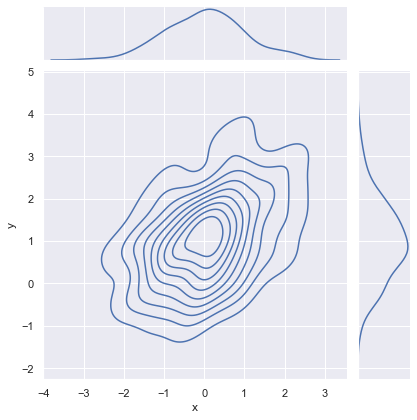

In [14]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

The `jointplot()` function uses a JointGrid to manage the figure. For more flexibility, you may want to draw your figure by using JointGrid directly. `jointplot()` returns the JointGrid object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

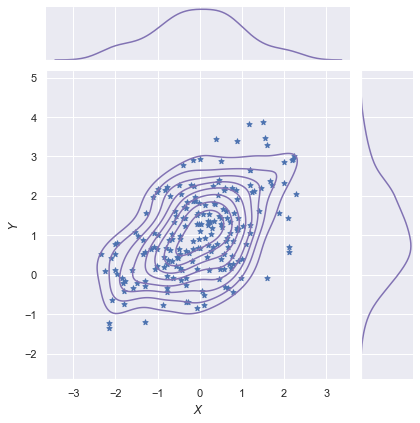

In [10]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the `pairplot()` function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:



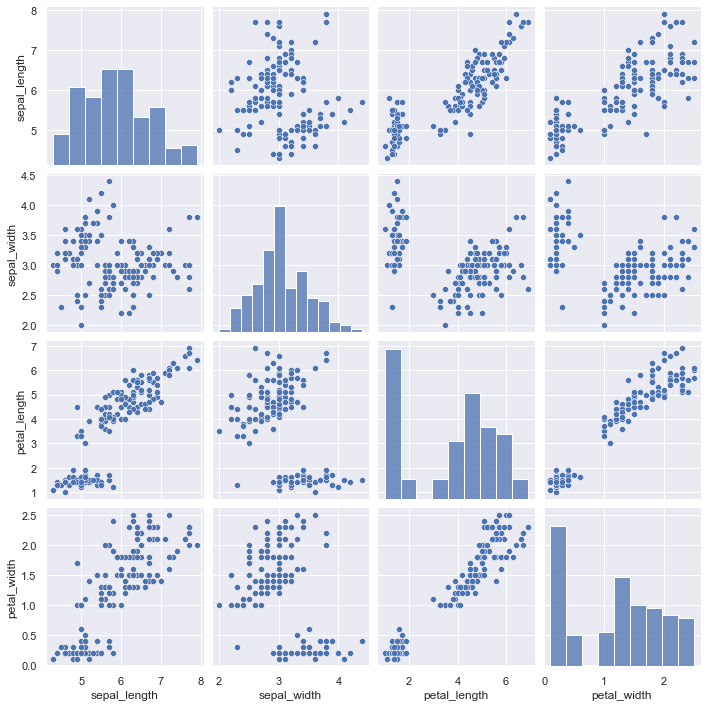

In [16]:
sns.pairplot(iris);

Much like the relationship between `jointplot()` and JointGrid, the `pairplot()` function is built on top of a PairGrid object, which can be used directly for more flexibility:


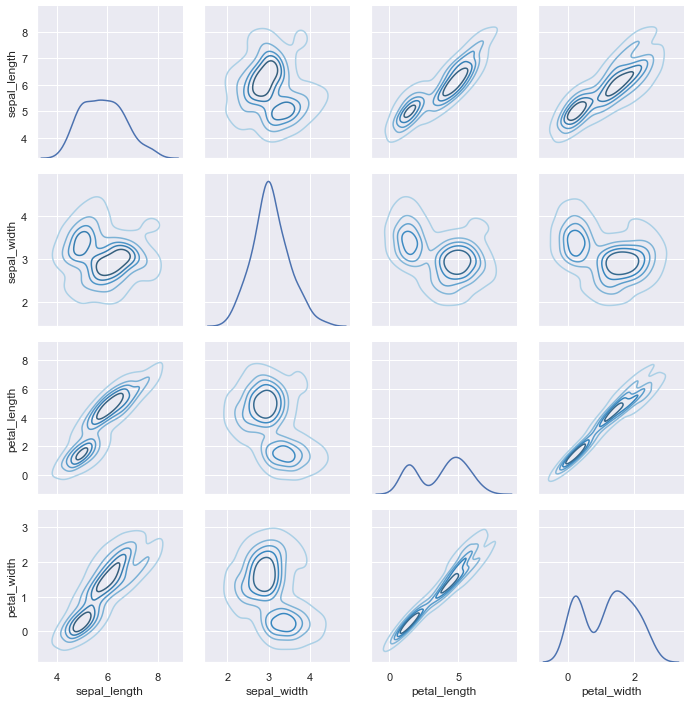

In [17]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

`PairGrid` is flexible, but to take a quick look at a dataset, it can be easier to use `pairplot()`. This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

You can also control the aesthetics of the plot with keyword arguments, and it returns the PairGrid instance for further tweaking.


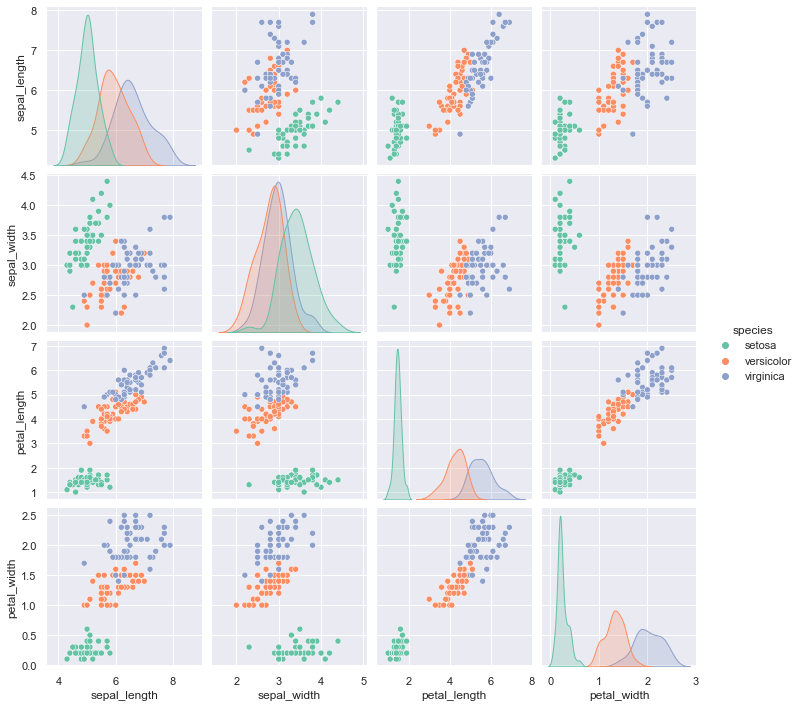

In [18]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)

## Plotting with categorical data

It’s useful to divide seaborn’s categorical plots into three groups: 

- those that show each observation at each level of the categorical variable. It includes the functions `swarmplot()` and `stripplot()`.

- those that show an abstract representation of each distribution of observations. This includes `boxplot()` and `violinplot()`.

- those that apply a statistical estimation to show a measure of central tendency and confidence interval. the third includes `barplot()` and `pointplot()`.


These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between regplot() and lmplot(), in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level factorplot(), which combines these functions with a FacetGrid to apply a categorical plot across a grid of figure panels.

### Categorical scatterplots

In [19]:
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

titanic = pd.read_csv("data/titanic.csv")
tips = pd.read_csv("data/tips.csv")

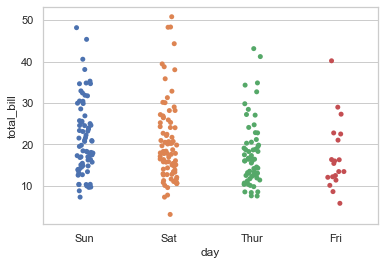

In [20]:
sns.stripplot(x="day", y="total_bill", data=tips);

A different approach would be to use the function `swarmplot()`, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

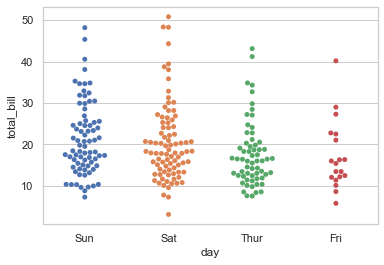

In [21]:
sns.swarmplot(x="day", y="total_bill", data=tips);


### Violinplots
A different approach is a `violinplot()`, which combines a boxplot with the kernel density estimation procedure.

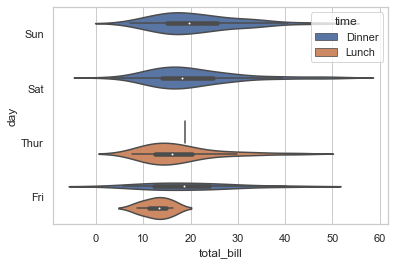

In [22]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

It can also be useful to combine `swarmplot()` or `swarmplot()` with `violinplot()` or `boxplot()` to show each observation along with a summary of the distribution:

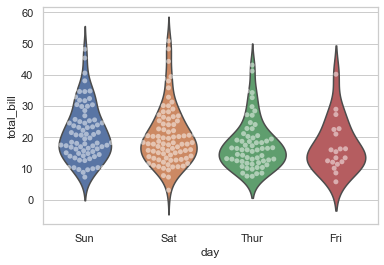

In [23]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

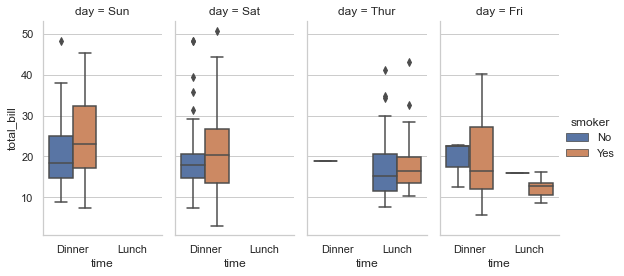

In [24]:
sns.catplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", height=4, aspect=.5);

## Visualizing linear relationships

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We previously discussed functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. The functions discussed in this chapter will do so through the common framework of linear regression.

In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statsmodels. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

In [25]:
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "regression")))

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, `regplot()` and `lmplot()` are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, `x` and `y`, and then fit the regression model `y ~ x` and plot the resulting regression line and a 95% confidence interval for that regression:

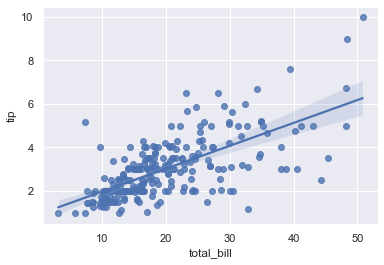

In [26]:
sns.regplot(x="total_bill", y="tip", data=tips);


It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal. 

One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

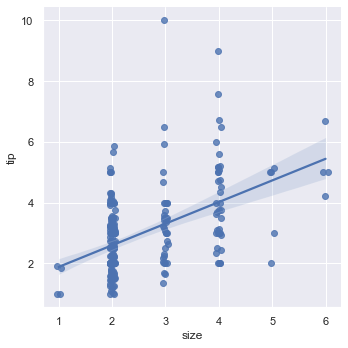

In [27]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);


The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the difference between `regplot()` and `lmplot()` appears. While `regplot()` always shows a single relationship, `lmplot()` combines `regplot()` with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

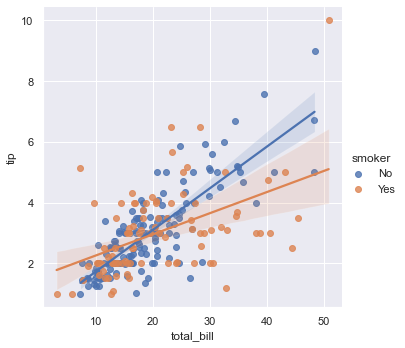

In [28]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In addition to color, it’s possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:



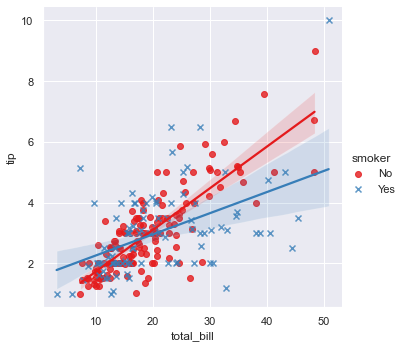

In [29]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:



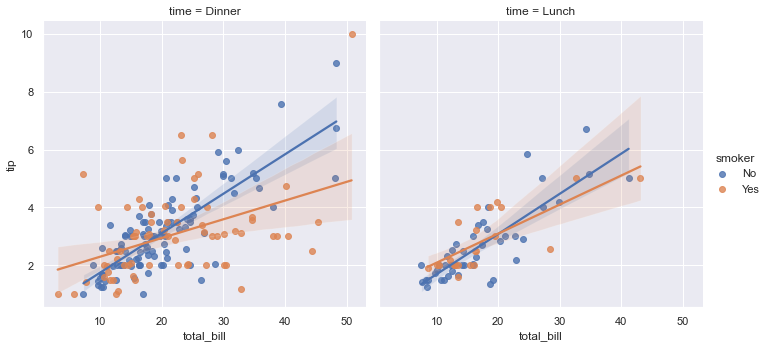

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);


A few other seaborn functions use `regplot()` in the context of a larger, more complex plot. The first is the `jointplot()` function that we introduced in the distributions tutorial. In addition to the plot styles previously discussed, `jointplot()` can use `regplot()` to show the linear regression fit on the joint axes by passing kind="reg":



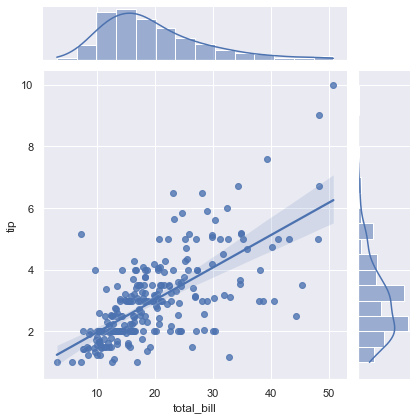

In [31]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

- Draw a heatmap with the numeric values in each cell

In [36]:
# Load the example flights dataset and convert to long-form
flights_long = pd.read_csv("data/flights.csv")
flights = flights_long.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

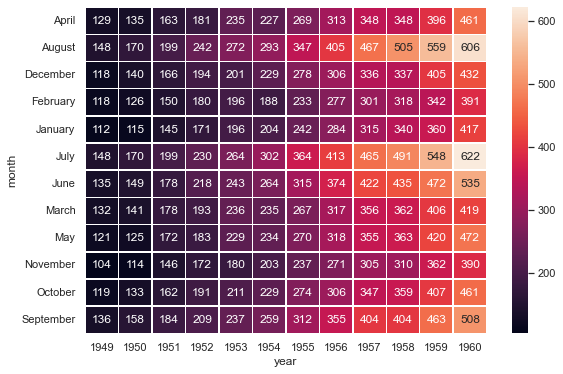

In [37]:
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)